<a href="https://colab.research.google.com/github/Baharuz/kuresel_isinma/blob/main/sicaklik_tahmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/datasets/global-temp/master/data/monthly.csv")
df.head()

,Source,Year,Mean
0,gcag,1850-01,-0.6746
1,gcag,1850-02,-0.3334
2,gcag,1850-03,-0.5913
3,gcag,1850-04,-0.5887
4,gcag,1850-05,-0.5088


In [9]:
df["Year"]=pd.to_datetime(df["Year"])
df["Year_ordinal"]=df["Year"].map(pd.Timestamp.toordinal)

In [16]:
x = df[["Year_ordinal"]]
y = df["Mean"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, shuffle=False)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
future_dates = pd.date_range(start=df["Year"].max(),periods=120,freq="M")
future_dates_ordinal = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1,1)
future_predictions = model.predict(future_dates_ordinal)
future_df = pd.DataFrame({"Year":future_dates,"Mean":future_predictions})


In [22]:
def predict_temperature_for_year(year):
  target_date = pd.Timestamp(f"{year}-01-01")
  ordinal = np.array([[target_date.toordinal()]])
  prediction = model.predict(ordinal)[0]
  return prediction

In [23]:
prediction_2030 = predict_temperature_for_year(2030)
print(f"2030'daki ortalama sıcaklık: {prediction_2030}")

2030'daki ortalama sıcaklık: 0.2764334016078145


In [31]:
print(type(future_predictions))
print(future_predictions[:5])

<class 'numpy.ndarray'>
[0.25297914 0.25334635 0.25370172 0.25406893 0.2544243 ]


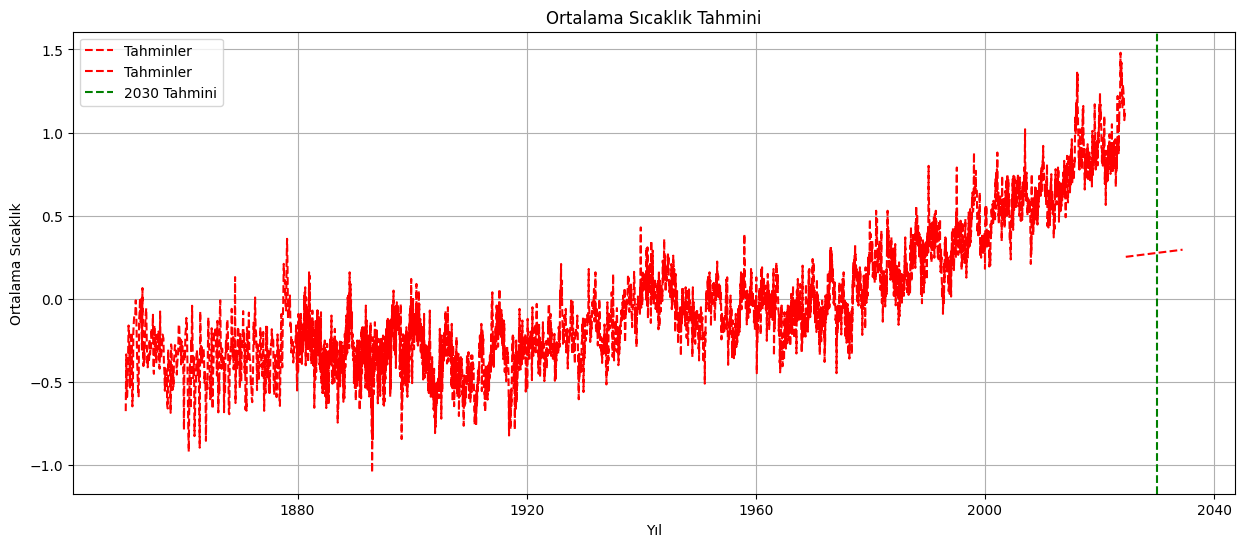

In [32]:
plt.figure(figsize = (15,6))
plt.plot(df["Year"],df["Mean"],label="Tahminler",color="red",linestyle="dashed")
plt.plot(future_df["Year"], future_predictions, label="Tahminler", color="red", linestyle="dashed")
plt.axvline(pd.Timestamp(f"2030-01-01"),color="green",linestyle="--",label="2030 Tahmini")
plt.title("Ortalama Sıcaklık Tahmini")
plt.xlabel("Yıl")
plt.ylabel("Ortalama Sıcaklık")
plt.grid(True)
plt.legend()
plt.show()